# Query data from NASA database and compare with own integrations.
Starting date: 01/01/2021.

---
Integrated 60 days.

Charon + 4 small moons.

by cristian.giuppone@unc.edu.ar Updated: 27/10/2021



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from math import *    #importa todas las operaciones matemáticas de math (sin, cos, tan, sqrt, pi, etc)
import pandas
plt.style.use('default')



In [ ]:
# https://www.iau.org/public/themes/measuring/ 
uam     = 1.495978707e11
c       = 2.99792458e8/uam #m/s/uam == ua/s
twopi   = pi*2
dy     = 365.25
k      = 1.720209895e-02
G      = k*k # Para ua, dias, msol
mearth = 3.04043e-6       # earth mass in solar masses
mjup   = 9.54792e-4       #pup in solar masses
rad    = twopi/360.0

import astropy.units as u
u.au

Unit("AU")

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')   #se puede hacer con el boton del costado!!
cwd = os.getcwd()
cwd
#drive dir
drive_dir = "/content/drive/MyDrive/pluto"
os.chdir (drive_dir)
#!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dire=''
c  = pandas.read_csv(dire+'planet101days.dat', delimiter='\s+', skiprows=0)
p1 = pandas.read_csv(dire+'planet102days.dat', delimiter='\s+', skiprows=0)
p2 = pandas.read_csv(dire+'planet202days.dat', delimiter='\s+', skiprows=0)
p3 = pandas.read_csv(dire+'planet302days.dat', delimiter='\s+', skiprows=0)
p4 = pandas.read_csv(dire+'planet402days.dat', delimiter='\s+', skiprows=0)
#M1 = pandas.read_csv('catalogo.csv')
p1.columns = [ 't',  'a',  'e',  'i',  'M',  'w',  'N',  'ly',  'Me']#p1=np.loadtxt('1.aeia', unpack=True)
p2.columns = p1.columns
p3.columns = p1.columns
p4.columns = p1.columns
c. columns = p1.columns 
#filt
cf  = pandas.read_csv(dire+'planetf101days.dat', delimiter='\s+', skiprows=0)
p1f = pandas.read_csv(dire+'planetf102days.dat', delimiter='\s+', skiprows=0)
p2f = pandas.read_csv(dire+'planetf202days.dat', delimiter='\s+', skiprows=0)
p3f = pandas.read_csv(dire+'planetf302days.dat', delimiter='\s+', skiprows=0)
p4f = pandas.read_csv(dire+'planetf402days.dat', delimiter='\s+', skiprows=0)
#M1 = pandas.read_csv('catalogo.csv')
p1f.columns = [ 't',  'a',  'e',  'i',  'M',  'w',  'N',  'ly',  'Me']#p1=np.loadtxt('1.aeia', unpack=True)
p2f.columns = p1f.columns
p3f.columns = p1f.columns
p4f.columns = p1f.columns

In [ ]:
!pip install astroquery --quiet
!pip install spiceypy --quiet   #https://github.com/AndrewAnnex/SpiceyPy#readme
import spiceypy as spice
# Print out the toolkit version
spice.tkvrsn("TOOLKIT")
epoch0 = 2451545.5
epoch0 = 2455198.00000 # 2021 1/



In [ ]:
epoch0 = {'start':'2021-01-01', 'stop':'2021-03-10', 'step':'6h'}
# https://ssd.jpl.nasa.gov/?sat_elem#ref58
from astroquery.jplhorizons import Horizons
objp = Horizons(id='Charon',  location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objb = Horizons(id='Charon',  location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objs = Horizons(id='Styx',    location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objn = Horizons(id='902',     location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objk = Horizons(id='Kerberos',location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objh = Horizons(id='Hydra',   location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter


In [ ]:
### pluto center....sin sentido
# objp = Horizons(id='Charon',  location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objb = Horizons(id='Charon',  location='500@9'  ,epochs=epoch0,id_type='majorbody') #baricenter
# objs = Horizons(id='Styx',    location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objn = Horizons(id='902',     location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objk = Horizons(id='Kerberos',location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objh = Horizons(id='Hydra',   location='500@999',epochs=epoch0,id_type='majorbody') #pluto center


In [ ]:
# print(obj)
elb = objb.elements(refplane='ecliptic') 
## elp = objp.elements(refplane='body')  # 999 solo si es pluto center no tiene sentido si es circumbinario
## sty = objs.elements(refplane='body')  # 999 solo si es pluto center 
## nix = objn.elements(refplane='body')  # 999 solo si es pluto center 
## ker = objk.elements(refplane='body')  # 999 solo si es pluto center 
## hyd = objh.elements(refplane='body')  # 999 solo si es pluto center 
# print(el)
elp = objp.elements(refplane='ecliptic')
sty = objs.elements(refplane='ecliptic')
nix = objn.elements(refplane='ecliptic')
ker = objk.elements(refplane='ecliptic')
hyd = objh.elements(refplane='ecliptic')

In [ ]:
# # print(el.columns) 
# print(*elb['a']*uam/1000.,*elb['e'],*elb['incl'],*elb['M'],*elb['w'],*elb['Omega'])
# print(*elp['a']*uam/1000.,*elp['e'],*elp['incl'],*elp['M'],*elp['w'],*elp['Omega'])
# print(*sty['a']*uam/1000.,*sty['e'],*sty['incl'],*sty['M'],*sty['w'],*sty['Omega'])
# print(*nix['a']*uam/1000.,*nix['e'],*nix['incl'],*nix['M'],*elp['w'],*nix['Omega'])
# print(*ker['a']*uam/1000.,*ker['e'],*ker['incl'],*ker['M'],*elp['w'],*ker['Omega'])
# print(*hyd['a']*uam/1000.,*hyd['e'],*hyd['incl'],*hyd['M'],*elp['w'],*hyd['Omega'])


In [ ]:
print(elb['a'][0]*uam/1000.)
print(sty['incl'][0],elb['incl'][0])

17488.8102858856
112.8635141810215 112.8979507079391


In [ ]:
# print(el.columns) 
print(elb['a'][0]*uam/1000.,elb['e'][0],elb['incl'][0],elb['M'][0],elb['w'][0],elb['Omega'][0])
print(elp['a'][0]*uam/1000.,elp['e'][0],elp['incl'][0],elp['M'][0],elp['w'][0],elp['Omega'][0], sep='\t')
print(sty['a'][0]*uam/1000.,sty['e'][0],sty['incl'][0],sty['M'][0],sty['w'][0],sty['Omega'][0],sep='\t')
print(nix['a'][0]*uam/1000.,nix['e'][0],nix['incl'][0],nix['M'][0],elp['w'][0],nix['Omega'][0],sep='\t')
print(ker['a'][0]*uam/1000.,ker['e'][0],ker['incl'][0],ker['M'][0],elp['w'][0],ker['Omega'][0],sep='\t')
print(hyd['a'][0]*uam/1000.,hyd['e'][0],hyd['incl'][0],hyd['M'][0],elp['w'][0],hyd['Omega'][0],sep='\t')


17488.8102858856 0.001170273416713699 112.8979507079391 358.5994380381806 291.4100821783542 227.3957326681582
19611.539878584765	0.0005756493165024409	112.8979525821762	356.7564767276539	293.2532533780964	227.3957337858027
43856.69162175046	0.03669500916246125	112.8635141810215	18.78890955140955	348.423883736432	227.4171660127551
49360.670988760445	0.0167819998752922	112.9231621949172	49.93562547518848	293.2532533780964	227.4538968546568
58200.34519682879	0.006817298827791923	112.567907194272	326.3262213044273	293.2532533780964	227.0889170297233
65334.48027154909	0.01222353753355166	113.086253005957	32.4539449660979	293.2532533780964	227.1562589886688


In [ ]:
# print(elp['w'][0])

293.2532533780964


In [ ]:
# print(el.columns) 
print(elb['a'][0]*uam/1000./1188.,elb['e'][0],elb['incl'][0],elb['M'][0],elb['w'][0],elb['Omega'][0])
print(elp['a'][0]*uam/1000./1188.,elp['e'][0],elp['incl'][0],elp['M'][0],elp['w'][0],elp['Omega'][0], sep='\t')
print(sty['a'][0]*uam/1000./1188.,sty['e'][0],sty['incl'][0],sty['M'][0],sty['w'][0],sty['Omega'][0],sep='\t')
print(nix['a'][0]*uam/1000./1188.,nix['e'][0],nix['incl'][0],nix['M'][0],elp['w'][0],nix['Omega'][0],sep='\t')
print(ker['a'][0]*uam/1000./1188.,ker['e'][0],ker['incl'][0],ker['M'][0],elp['w'][0],ker['Omega'][0],sep='\t')
print(hyd['a'][0]*uam/1000./1188.,hyd['e'][0],hyd['incl'][0],hyd['M'][0],elp['w'][0],hyd['Omega'][0],sep='\t')

14.721220779364984 0.001170273416713699 112.8979507079391 358.5994380381806 291.4100821783542 227.3957326681582
16.508030200828927	0.0005756493165024409	112.8979525821762	356.7564767276539	293.2532533780964	227.3957337858027
36.91640708901554	0.03669500916246125	112.8635141810215	18.78890955140955	348.423883736432	227.4171660127551
41.54938635417546	0.0167819998752922	112.9231621949172	49.93562547518848	293.2532533780964	227.4538968546568
48.9901895596202	0.006817298827791923	112.567907194272	326.3262213044273	293.2532533780964	227.0889170297233
54.99535376393021	0.01222353753355166	113.086253005957	32.4539449660979	293.2532533780964	227.1562589886688


In [ ]:
print(*elp['a']*uam/1000.,*elp['e'],*elp['incl'],*elp['M'],*elp['w'],*elp['Omega'])



19611.539878584765 19611.544637267678 19611.538817415116 19611.528478162658 19611.52763136086 19611.54088087861 19611.550752387884 19611.53752270592 19611.532906939978 19611.5316226953 19611.53971593446 19611.526268445377 19611.51149377186 19611.513229945853 19611.52643878815 19611.536586917427 19611.537255661227 19611.53314678535 19611.53123074451 19611.532870380226 19611.534571074317 19611.534159413874 19611.53402208901 19611.537407596716 19611.54235785693 19611.541541382812 19611.530492721056 19611.516130862135 19611.51316029349 19611.52651014234 19611.538504042135 19611.528879214176 19611.528696416914 19611.532165018612 19611.54494394916 19611.53565317639 19611.52439061857 19611.52805379971 19611.540950368257 19611.548522429337 19611.54476310761 19611.535095997835 19611.52748131375 19611.52434457291 19611.522977400786 19611.521480805466 19611.522089529222 19611.527764689472 19611.536289870015 19611.53996370938 19611.533609948314 19611.5231889858 19611.52269873961 19611.53700529511 

In [ ]:
# time = elp['datetime_jd'] 
# time

In [ ]:
time = elp['datetime_jd'] 
time = time[-1]-time[0]
print (time)
time = elp['datetime_jd'] 
time = (time[:]-time[0])
time.shape

68.0


(273,)

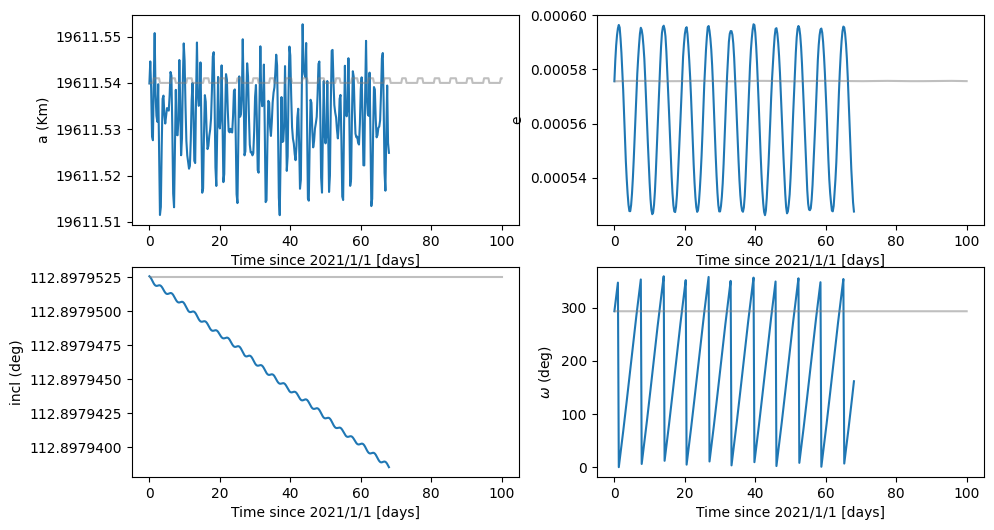

In [ ]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,elp['a']*uam/1000.)
plt.plot(c.t,c.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,elp['e'])
plt.plot(c.t,c.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('e')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,elp['incl'])
plt.plot(c.t,c.i+0.0000025, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,elp['w'])
plt.plot(c.t,c.w, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel(r'$\omega$ (deg)')



plt.savefig('Charondays.png')

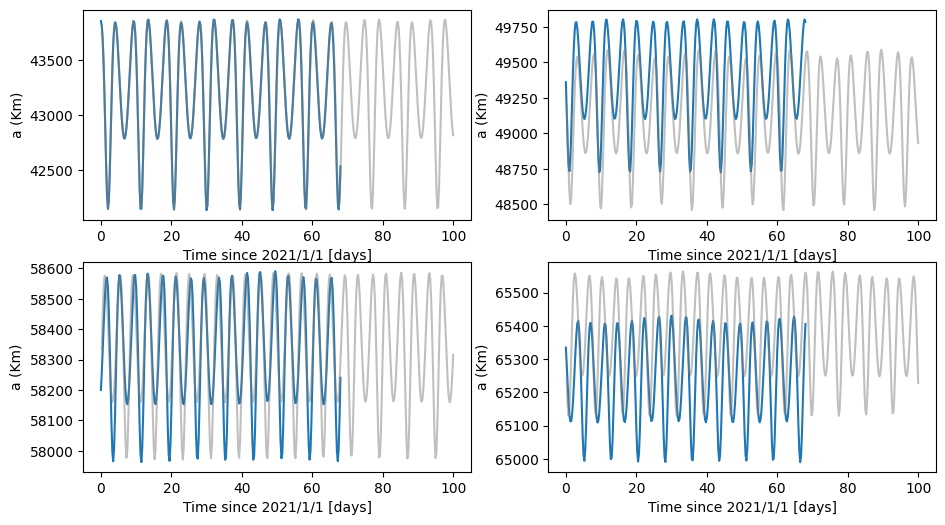

In [ ]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['a']*uam/1000.)
plt.plot(p1.t,p1.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['a']*uam/1000.)
plt.plot(p1.t,p2.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['a']*uam/1000.)
plt.plot(p1.t,p3.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['a']*uam/1000.)
plt.plot(p1.t,p4.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('a (Km)')

plt.savefig('a-moonsdays.png')

In [ ]:
# plt.plot(time,hyd['a']*uam/1000.)
# plt.plot(p1.t,p4.a, c='gray',alpha=0.5)

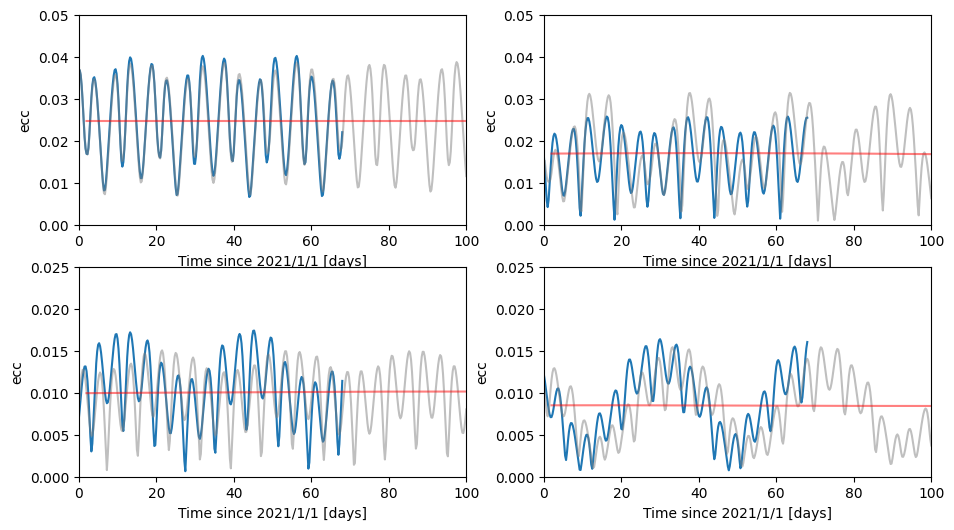

In [ ]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,100)
plt.plot(time,sty['e'])
plt.plot(p1.t,p1.e, c='gray',alpha=0.5)
plt.plot(p1f.t,p1f.e, c='red',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('ecc')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,100)
plt.plot(time,nix['e'])
plt.plot(p2.t,p2.e, c='gray',alpha=0.5)
plt.plot(p2f.t,p2f.e, c='red',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('ecc')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,100)
plt.plot(time,ker['e'])
plt.plot(p3.t,p3.e, c='gray',alpha=0.5)
plt.plot(p3f.t,p3f.e, c='red',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('ecc')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,100)
plt.plot(time,hyd['e'])
plt.plot(p4.t,p4.e, c='gray',alpha=0.5)
plt.plot(p4f.t,p4f.e, c='red',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('ecc')

plt.savefig('e-moonscomparedays.png')

Text(0.5, 0, 'Time since 2021/1/1 [days]')

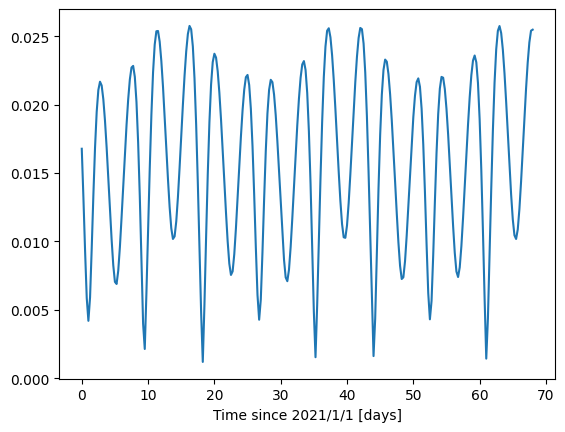

In [ ]:

plt.plot(time,nix['e'])
plt.xlabel('Time since 2021/1/1 [days]')


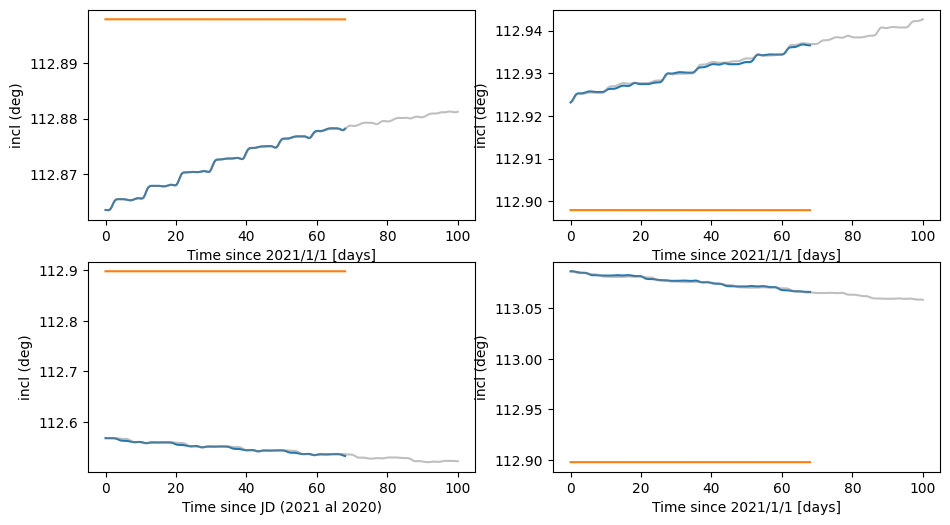

In [ ]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['incl'])
plt.plot(time,elb['incl'])
plt.plot(p1.t,p1.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['incl'])
plt.plot(time,elb['incl'])
plt.plot(p2.t,p2.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['incl'])
plt.plot(time,elb['incl'])
plt.plot(p3.t,p3.i, c='gray',alpha=0.5)
plt.xlabel('Time since JD (2021 al 2020)')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['incl'])
plt.plot(time,elb['incl'])
plt.plot(p4.t,p4.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel('incl (deg)')

plt.savefig('incl-moonsdays.png')

In [ ]:
Comparison numetrical integration with retrieved data from JPL, Longitude of Node, for the 4 moons

SyntaxError: ignored

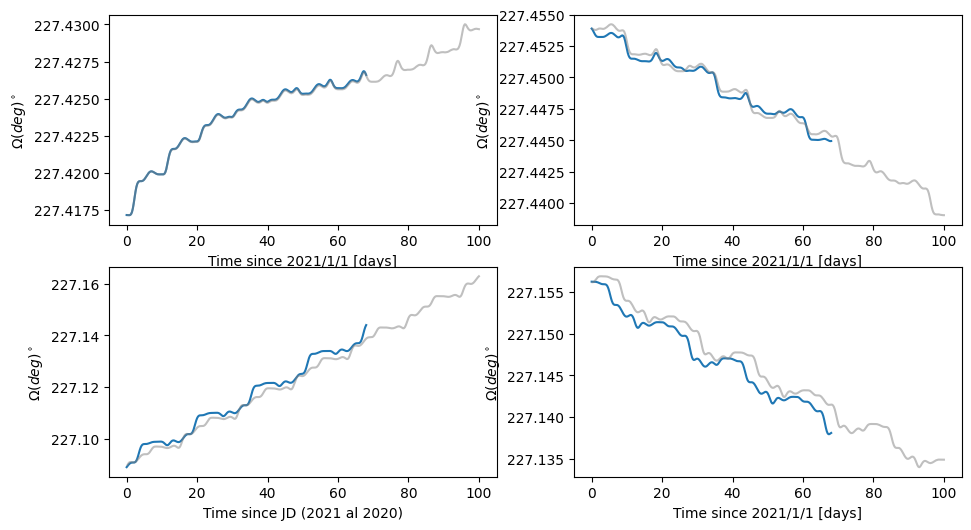

In [ ]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['Omega'])
plt.plot(p1.t,p1.N, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel(r'$\Omega (deg)^\circ$')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['Omega'])
plt.plot(p2.t,p2.N, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel(r'$\Omega (deg)^\circ$')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['Omega'])
plt.plot(p3.t,p3.N, c='gray',alpha=0.5)
plt.xlabel('Time since JD (2021 al 2020)')
plt.ylabel(r'$\Omega (deg)^\circ$')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['Omega'])
plt.plot(p4.t,p4.N, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel(r'$\Omega (deg)^\circ$')

plt.savefig('incl-moonsOmegadays.png')

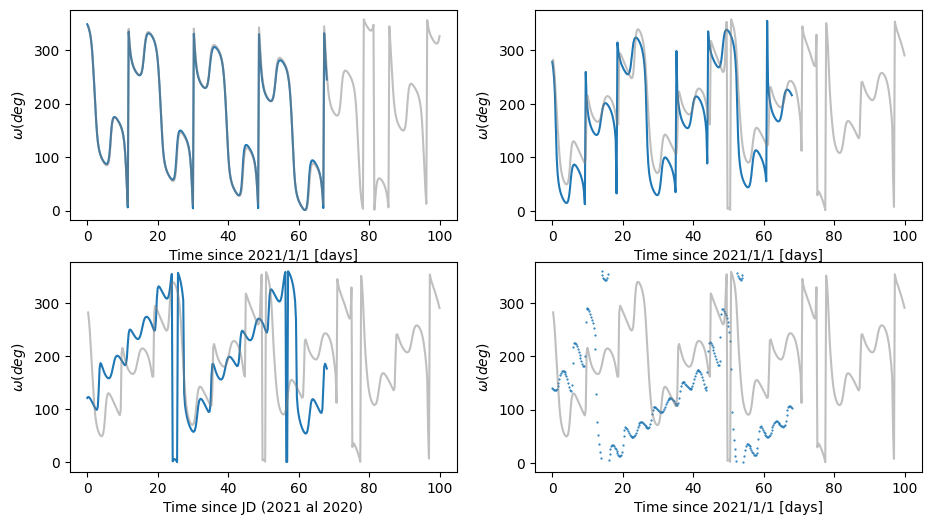

In [ ]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['w'])
plt.plot(p1.t,p1.w, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel(r'$\omega (deg)$')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['w'])
plt.plot(p1.t,p2.w, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel(r'$\omega (deg)$')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['w'])
plt.plot(p1.t,p2.w, c='gray',alpha=0.5)
plt.xlabel('Time since JD (2021 al 2020)')
plt.ylabel(r'$\omega (deg)$')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.scatter(time,hyd['w'], s=0.3)
plt.plot(p1.t,p2.w, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [days]')
plt.ylabel(r'$\omega (deg)$')

plt.savefig('w-moonsdays.png')

In [ ]:
print ((np.max(sty['a'])-np.min(sty['a']))*uam/1000.,(np.max(nix['a'])-np.min(nix['a']))*uam/1000.,(np.max(ker['a'])-np.min(ker['a']))*uam/1000., (np.max(hyd['a'])-np.min(hyd['a']))*uam/1000.)
print ((np.max(sty['e'])-np.min(sty['e'])),(np.max(nix['e'])-np.min(nix['e'])),(np.max(ker['e'])-np.min(ker['e'])), (np.max(hyd['e'])-np.min(hyd['e'])))

print ((np.max(sty['incl'])-np.min(sty['incl'])),(np.max(nix['incl'])-np.min(nix['incl'])),(np.max(ker['incl'])-np.min(ker['incl'])), (np.max(hyd['incl'])-np.min(hyd['incl'])))

1741.3165753915287 1079.8573547217109 627.9301620133617 440.91452609493433
0.03360641127723676 0.024573196034241317 0.016749088482766697 0.01561564105928645
0.014786835615396399 0.013580908773406009 0.03526511476640337 0.02035258707660148


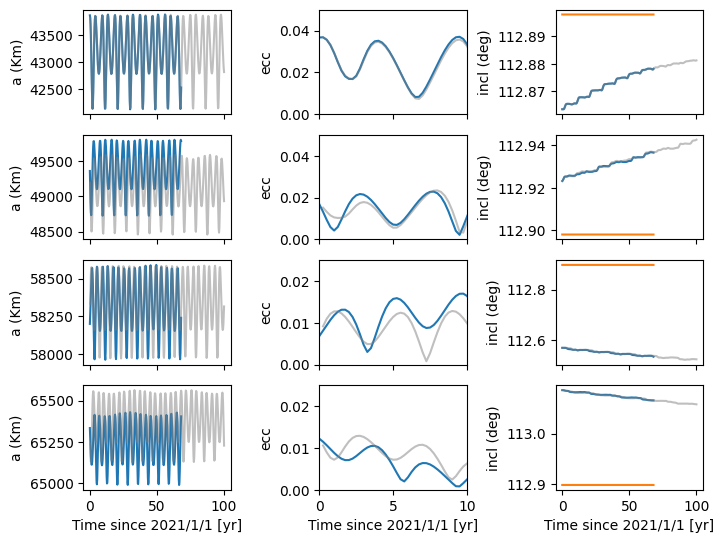

In [ ]:
plt.figure(figsize=(8,6))


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.6   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


ax1=plt.subplot(4,3,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['a']*uam/1000.)
plt.plot(p1.t,p1.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['a']*uam/1000.)
plt.plot(p1.t,p2.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)

ax1=plt.subplot(4,3,7)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['a']*uam/1000.)
plt.plot(p1.t,p3.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,10)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['a']*uam/1000.)
plt.plot(p1.t,p4.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('a (Km)')
# plt.tight_layout()


ax1=plt.subplot(4,3,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,sty['e'])
plt.plot(p1.t,p1.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,5)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,nix['e'])
plt.plot(p2.t,p2.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,8)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,ker['e'])
plt.plot(p3.t,p3.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,11)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,hyd['e'])
plt.plot(p4.t,p4.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('ecc')
# plt.tight_layout()

ax1=plt.subplot(4,3,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['incl'])
plt.plot(time,elb['incl'])
plt.plot(p1.t,p1.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,6)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['incl'])
plt.plot(time,elb['incl'])
plt.plot(p2.t,p2.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,9)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['incl'])
plt.plot(time,elb['incl'])
plt.plot(p3.t,p3.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,12)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['incl'])
plt.plot(time,elb['incl'])
plt.plot(p4.t,p4.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('incl (deg)')
# plt.tight_layout()


plt.savefig('all-moonsdays.png')


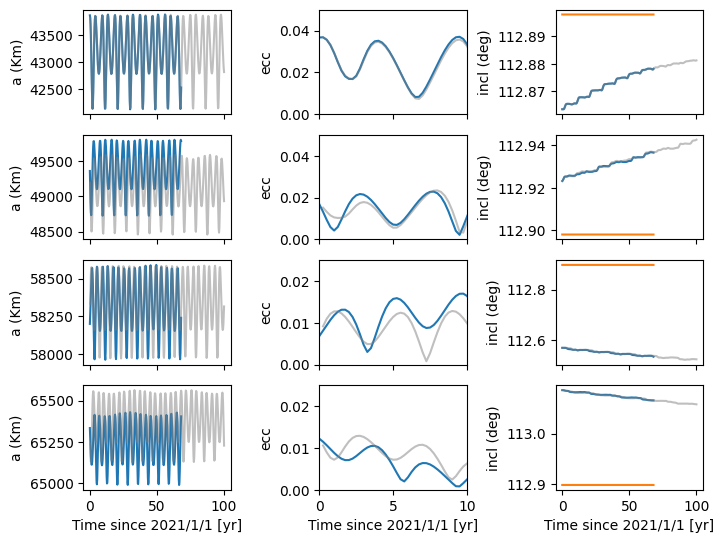

In [ ]:
plt.figure(figsize=(8,6))


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.6   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


ax1=plt.subplot(4,3,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['a']*uam/1000.)
plt.plot(p1.t,p1.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['a']*uam/1000.)
plt.plot(p1.t,p2.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)

ax1=plt.subplot(4,3,7)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['a']*uam/1000.)
plt.plot(p1.t,p3.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,10)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['a']*uam/1000.)
plt.plot(p1.t,p4.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('a (Km)')
# plt.tight_layout()


ax1=plt.subplot(4,3,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,sty['e'])
plt.plot(p1.t,p1.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,5)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,nix['e'])
plt.plot(p2.t,p2.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,8)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,ker['e'])
plt.plot(p3.t,p3.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,11)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,hyd['e'])
plt.plot(p4.t,p4.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('ecc')
# plt.tight_layout()

ax1=plt.subplot(4,3,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['incl'])
plt.plot(time,elb['incl'])
plt.plot(p1.t,p1.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,6)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['incl'])
plt.plot(time,elb['incl'])
plt.plot(p2.t,p2.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,9)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['incl'])
plt.plot(time,elb['incl'])
plt.plot(p3.t,p3.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,12)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['incl'])
plt.plot(time,elb['incl'])
plt.plot(p4.t,p4.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('incl (deg)')
# plt.tight_layout()


plt.savefig('all-moonsdays.png')


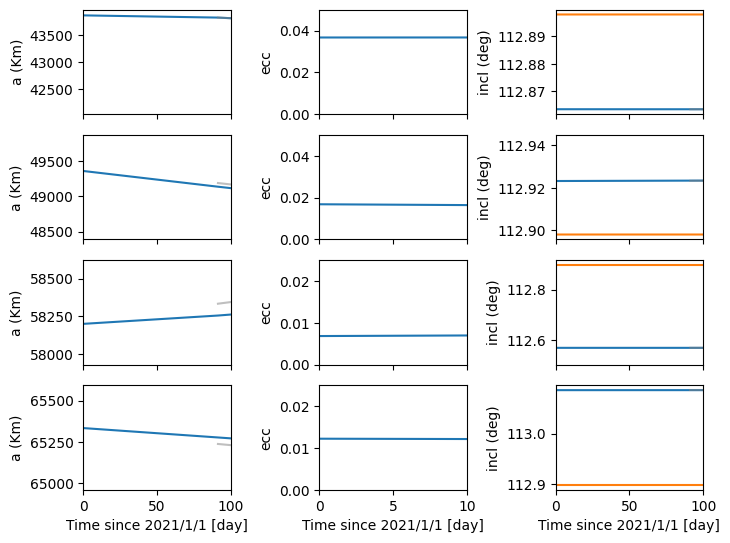

In [ ]:
plt.figure(figsize=(8,6))


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.6   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


ax1=plt.subplot(4,3,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,sty['a']*uam/1000.)
plt.plot(p1.t*365.25,p1.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,nix['a']*uam/1000.)
plt.plot(p1.t*365.25,p2.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)

ax1=plt.subplot(4,3,7)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,ker['a']*uam/1000.)
plt.plot(p1.t*365.25,p3.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,10)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,hyd['a']*uam/1000.)
plt.plot(p1.t*365.25,p4.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [day]')
plt.ylabel('a (Km)')
# plt.tight_layout()


ax1=plt.subplot(4,3,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time*365.25,sty['e'])
plt.plot(p1.t*365.25,p1.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,5)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time*365.25,nix['e'])
plt.plot(p2.t*365.25,p2.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,8)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time*365.25,ker['e'])
plt.plot(p3.t*365.25,p3.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,11)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time*365.25,hyd['e'])
plt.plot(p4.t*365.25,p4.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [day]')
plt.ylabel('ecc')
# plt.tight_layout()

ax1=plt.subplot(4,3,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,sty['incl'])
plt.plot(time*365.25,elb['incl'])
plt.plot(p1.t*365.25,p1.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,6)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,nix['incl'])
plt.plot(time*365.25,elb['incl'])
plt.plot(p2.t*365.25,p2.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,9)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,ker['incl'])
plt.plot(time*365.25,elb['incl'])
plt.plot(p3.t*365.25,p3.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,12)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,hyd['incl'])
plt.plot(time*365.25,elb['incl'])
plt.plot(p4.t*365.25,p4.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [day]')
plt.ylabel('incl (deg)')
# plt.tight_layout()


plt.savefig('allday-moonsdays.png')


In [ ]:
plt.figure(figsize=(8,6))


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.6   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


ax1=plt.subplot(4,3,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time*365.25sty['a']*uam/1000.)
plt.plot(p1.t,p1.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time*365.25nix['a']*uam/1000.)
plt.plot(p1.t,p2.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)

ax1=plt.subplot(4,3,7)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time*365.25ker['a']*uam/1000.)
plt.plot(p1.t,p3.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,10)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time*365.25hyd['a']*uam/1000.)
plt.plot(p1.t,p4.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('a (Km)')
# plt.tight_layout()


ax1=plt.subplot(4,3,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time*365.25sty['e'])
plt.plot(p1.t,p1.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,5)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time*365.25nix['e'])
plt.plot(p2.t,p2.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,8)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time*365.25ker['e'])
plt.plot(p3.t,p3.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,11)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time*365.25hyd['e'])
plt.plot(p4.t,p4.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('ecc')
# plt.tight_layout()

ax1=plt.subplot(4,3,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time*365.25sty['incl'])
plt.plot(time*365.25elb['incl'])
plt.plot(p1.t,p1.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,6)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time*365.25nix['incl'])
plt.plot(time*365.25elb['incl'])
plt.plot(p2.t,p2.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,9)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['incl'])
plt.plot(time,elb['incl'])
plt.plot(p3.t,p3.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,12)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['incl'])
plt.plot(time,elb['incl'])
plt.plot(p4.t,p4.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('incl (deg)')
# plt.tight_layout()


plt.savefig('all-moonsdays.png')


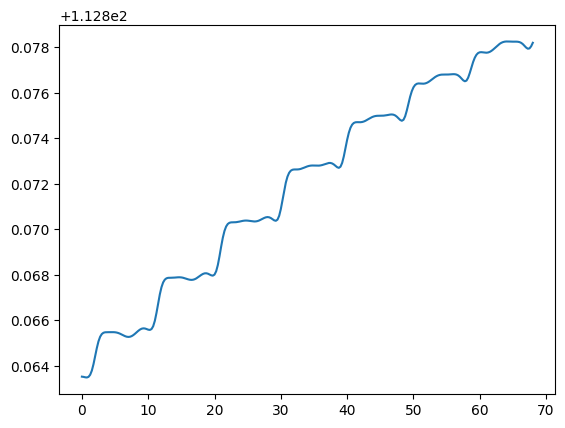

In [ ]:
plt.plot(time,sty['incl'])


In [ ]:
#test inclination.

### pluto center....sin sentido
objp = Horizons(id='Charon',  location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objb = Horizons(id='Charon',  location='500@9'  ,epochs=epoch0,id_type='majorbody') #baricenter
objs = Horizons(id='Styx',    location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objn = Horizons(id='902',     location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objk = Horizons(id='Kerberos',location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objh = Horizons(id='Hydra',   location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# print(obj)
elb = objb.elements(refplane='ecliptic') 
elp = objp.elements(refplane='body')  # 999 solo si es pluto center no tiene sentido si es circumbinario
sty = objs.elements(refplane='body')  # 999 solo si es pluto center 
nix = objn.elements(refplane='body')  # 999 solo si es pluto center 
ker = objk.elements(refplane='body')  # 999 solo si es pluto center 
hyd = objh.elements(refplane='body')  # 999 solo si es pluto center 
# print(el)
# elp = objp.elements(refplane='body')
# sty = objs.elements(refplane='ecliptic')
# nix = objn.elements(refplane='ecliptic')
# ker = objk.elements(refplane='ecliptic')
# hyd = objh.elements(refplane='ecliptic')

In [ ]:
print(elb['a'][0]*uam/1000.,elb['e'][0],elb['incl'][0],elb['M'][0],elb['w'][0],elb['Omega'][0])
print(elp['a'][0]*uam/1000.,elp['e'][0],elp['incl'][0],elp['M'][0],elp['w'][0],elp['Omega'][0])
print(sty['a'][0]*uam/1000.,sty['e'][0],sty['incl'][0]-elb['incl'][0]+elp['incl'][0],sty['M'][0],sty['w'][0],sty['Omega'][0])
print(nix['a'][0]*uam/1000.,nix['e'][0],nix['incl'][0]-elb['incl'][0]+elp['incl'][0],nix['M'][0],elp['w'][0],nix['Omega'][0])
print(ker['a'][0]*uam/1000.,ker['e'][0],ker['incl'][0]-elb['incl'][0]+elp['incl'][0],ker['M'][0],elp['w'][0],ker['Omega'][0])
print(hyd['a'][0]*uam/1000.,hyd['e'][0],hyd['incl'][0]-elb['incl'][0]+elp['incl'][0],hyd['M'][0],elp['w'][0],hyd['Omega'][0])


17488.8102858856 0.001170273416713699 112.8979507079391 358.5994380381806 291.4100821783542 227.3957326681582
19611.539878584783 0.0005756493165025798 0.09219409018718273 356.7564767276536 266.5929548705576 9.528959765509201
59476.54845241573 0.2997501199859279 -112.72382685970793 14.70813704941492 287.6184966518613 32.98182597003687
104178.16093818264 0.5201273869633491 -112.66197819293969 3.708667561354232 266.5929548705576 21.73973099516429
44808.71226711791 0.2561206861611763 -112.42436611044367 161.5652575387433 266.5929548705576 208.8850058576481
61814.732397895226 0.1567827552876379 -112.43144954145617 267.1576581830032 266.5929548705576 314.2213984544077
